In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x = 6*np.random.rand(200,1)-3
y = 0.8*x**2+0.9*x+2+np.random.rand(200,1)
# Y=0.8X^2 + O.9X + 2

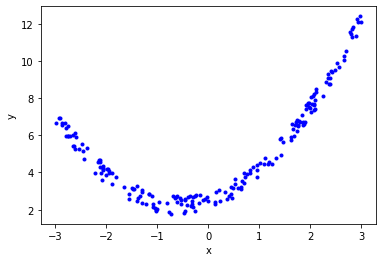

In [3]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.28057043536167825

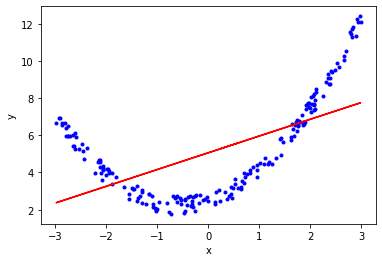

In [8]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train,reg.predict(x_train),color='red')
plt.show()

In [16]:
#applying polynomial linear regression
#degree 2

poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [17]:
print(x_train_trans[0],x_test_trans[0])

[1.         0.22859157 0.0522541 ] [ 1.         -2.531703    6.40952009]


In [18]:
reg = LinearRegression()
reg.fit(x_train_trans,y_train)

LinearRegression()

In [19]:
r2_score(y_test,reg.predict(x_test_trans))

0.9881844476729766

In [20]:
print("coef = ",reg.coef_)
print("intercept = ",reg.intercept_)

coef =  [[0.         0.89475905 0.7892259 ]]
intercept =  [2.5708648]


In [21]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = reg.predict(x_new_poly)

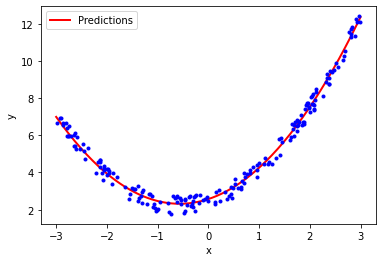

In [22]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()